In [1]:
import pytagcloud, random, webbrowser
from konlpy.tag import Twitter
from collections import Counter

In [2]:
# get_tags함수에 워드클라우드에 포함될 명사 추출
def get_tags(text, ntags=100, multiplier=1):
    t = Twitter()
    nouns = []
    for sentence in text:
        for noun in t.nouns(sentence): # t.nouns : 명사만 추출
            nouns.append(noun)
    count = Counter(nouns)
    return [{'color':color(), 'tag':n, 'size':2*c*multiplier} for n, c in count.most_common(ntags)]

In [11]:
# 워드클라우드가 출력되는 space 구축
def draw_cloud(tags, filename, fontname='Noto Sans CJK', size=(200, 120)):
    pytagcloud.create_tag_image(tags, filename, fontname=fontname, size=size)
    webbrowser.open(filename)

In [7]:
# 단어를 구분하기 위해 색을 추출 
r = lambda: random.randint(0, 255)
color = lambda: (r(), r(), r())

In [12]:
# 워드클라우드
okjak = []
file = open('okja.txt', 'r', encoding='utf-8')
lines = file.readlines()
for line in lines:
    okjak.append(line)
file.close()

tags = get_tags(okjak)
draw_cloud(tags, 'wc.png')

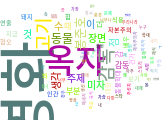

In [13]:
from IPython.display import Image
Image('wc.png')